# Importing Libraries

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Dataset

In [86]:
# 8 variables: 
#
# MPG (miles per gallon), 
# cylinders, 
# engine displacement (cu. inches), 
# horsepower,
# vehicle weight (lbs.), 
# time to accelerate from O to 60 mph (sec.),
# model year (modulo 100), and 
# origin of car (1. American, 2. European,3. Japanese).
#
# Also provided are the car labels (types) 
# Missing data values are marked by series of question marks.

In [87]:
df = pd.read_csv("auto-mpg.csv")

In [88]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [89]:
df.shape

(398, 9)

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


# Dealing with the 'origin' column

In [91]:
df["origin"] = df["origin"].map({1: "american", 2: "european", 3: "asian"})

In [92]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,american,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,american,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,american,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,american,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,american,ford torino


### Creating Dummy Variables

In [93]:
df = pd.get_dummies(df, columns=["origin"])

In [94]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,origin_american,origin_asian,origin_european
0,18.0,8,307.0,130,3504,12.0,70,chevrolet chevelle malibu,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,buick skylark 320,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,plymouth satellite,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,amc rebel sst,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,ford torino,1,0,0


# Dealing with '?' in 'horsepower' column

In [95]:
df.dtypes

mpg                float64
cylinders            int64
displacement       float64
horsepower          object
weight               int64
acceleration       float64
model year           int64
car name            object
origin_american      uint8
origin_asian         uint8
origin_european      uint8
dtype: object

In [96]:
df[df["horsepower"].str.isdigit() == False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,origin_american,origin_asian,origin_european
32,25.0,4,98.0,?,2046,19.0,71,ford pinto,1,0,0
126,21.0,6,200.0,?,2875,17.0,74,ford maverick,1,0,0
330,40.9,4,85.0,?,1835,17.3,80,renault lecar deluxe,0,0,1
336,23.6,4,140.0,?,2905,14.3,80,ford mustang cobra,1,0,0
354,34.5,4,100.0,?,2320,15.8,81,renault 18i,0,0,1
374,23.0,4,151.0,?,3035,20.5,82,amc concord dl,1,0,0


In [97]:
df["horsepower"].replace("?", np.nan, inplace=True)

In [98]:
df["horsepower"].fillna(df["horsepower"].median(), inplace=True)

In [99]:
df.dtypes

mpg                float64
cylinders            int64
displacement       float64
horsepower          object
weight               int64
acceleration       float64
model year           int64
car name            object
origin_american      uint8
origin_asian         uint8
origin_european      uint8
dtype: object

In [100]:
df["horsepower"] = df["horsepower"].astype(float)

In [101]:
df.dtypes

mpg                float64
cylinders            int64
displacement       float64
horsepower         float64
weight               int64
acceleration       float64
model year           int64
car name            object
origin_american      uint8
origin_asian         uint8
origin_european      uint8
dtype: object

In [102]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,origin_american,origin_asian,origin_european
0,18.0,8,307.0,130.0,3504,12.0,70,chevrolet chevelle malibu,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,buick skylark 320,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,plymouth satellite,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,amc rebel sst,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,ford torino,1,0,0


# Correlation between the given features

In [103]:
df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_american,origin_asian,origin_european
mpg,1.000000,-0.775396,-0.804203,-0.773453,-0.831741,0.420289,0.579267,-0.568192,0.442174,0.259022
cylinders,-0.775396,1.000000,0.950721,0.841284,0.896017,-0.505419,-0.348746,0.604351,-0.396479,-0.352861
displacement,-0.804203,0.950721,1.000000,0.895778,0.932824,-0.543684,-0.370164,0.651407,-0.433505,-0.373886
horsepower,-0.773453,0.841284,0.895778,1.000000,0.862442,-0.686590,-0.413733,0.485418,-0.318972,-0.282877
weight,-0.831741,0.896017,0.932824,0.862442,1.000000,-0.417457,-0.306564,0.598398,-0.440817,-0.298843
acceleration,0.420289,-0.505419,-0.543684,-0.686590,-0.417457,1.000000,0.288137,-0.250806,0.109144,0.204473
model year,0.579267,-0.348746,-0.370164,-0.413733,-0.306564,0.288137,1.000000,-0.139883,0.193101,-0.024489
origin_american,-0.568192,0.604351,0.651407,0.485418,0.598398,-0.250806,-0.139883,1.000000,-0.643317,-0.597198
origin_asian,0.442174,-0.396479,-0.433505,-0.318972,-0.440817,0.109144,0.193101,-0.643317,1.000000,-0.229895
origin_european,0.259022,-0.352861,-0.373886,-0.282877,-0.298843,0.204473,-0.024489,-0.597198,-0.229895,1.000000


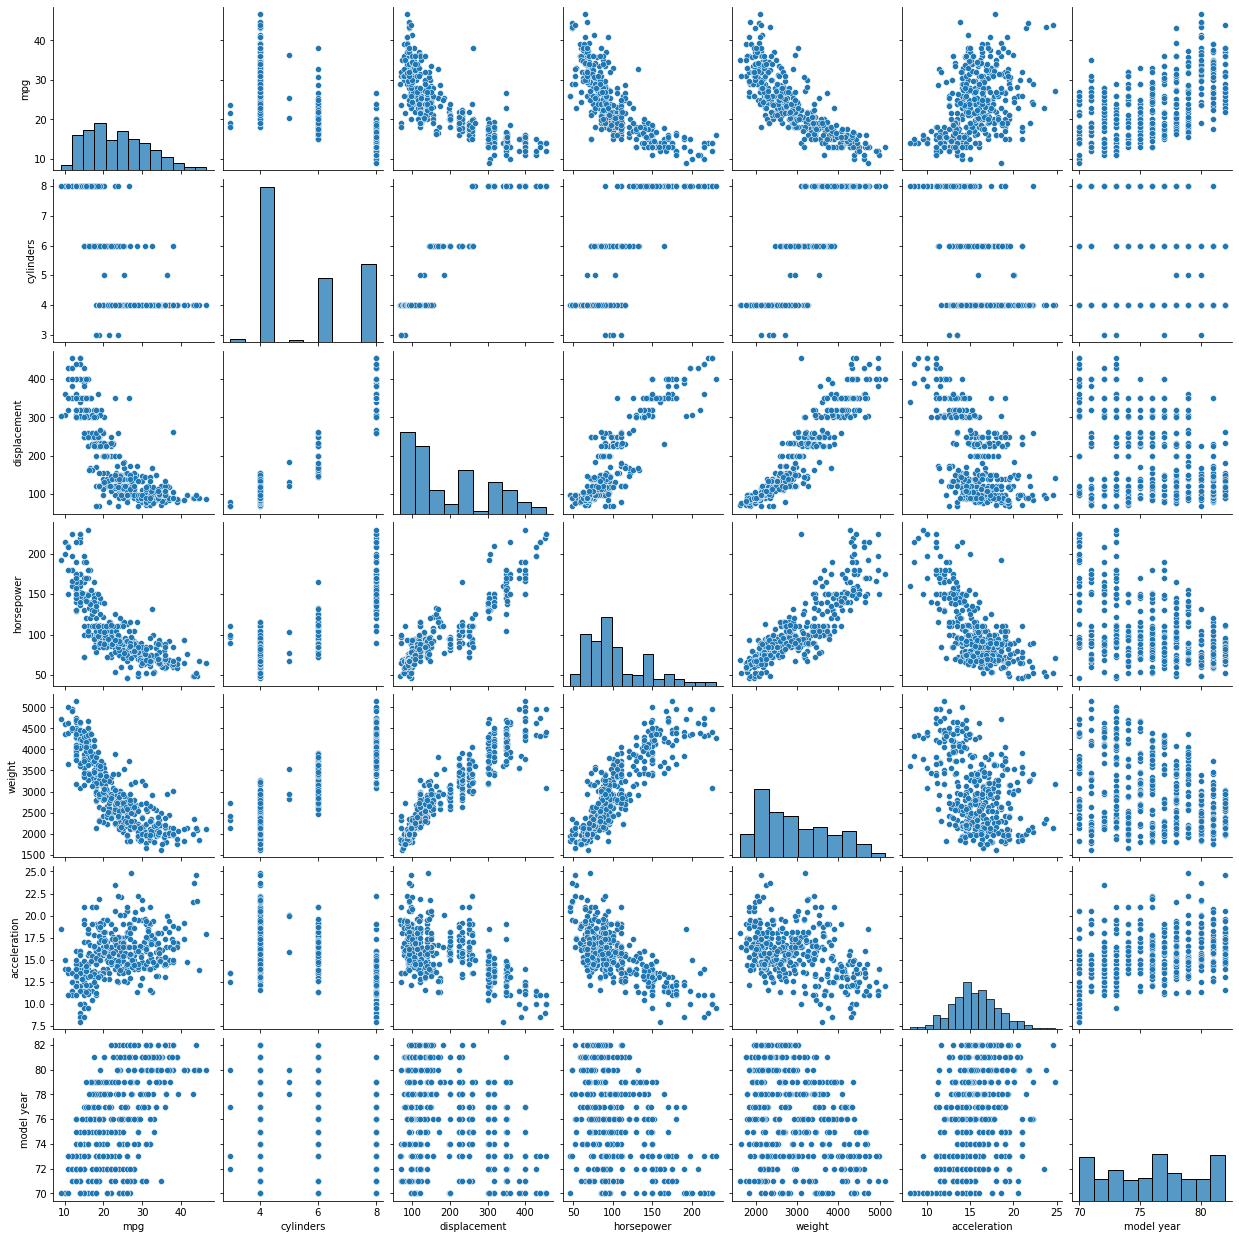

In [104]:
sns.pairplot(df.iloc[:, :7])

# Machine Learning

### Splitting the data

In [105]:
X = df.drop(labels=["mpg", "car name"], axis=1)
y = df[["mpg"]]

In [106]:
X.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin_american,origin_asian,origin_european
0,8,307.0,130.0,3504,12.0,70,1,0,0
1,8,350.0,165.0,3693,11.5,70,1,0,0
2,8,318.0,150.0,3436,11.0,70,1,0,0
3,8,304.0,150.0,3433,12.0,70,1,0,0
4,8,302.0,140.0,3449,10.5,70,1,0,0


In [107]:
y.head()

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0


In [108]:
from sklearn.model_selection import train_test_split

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

### Applying Linear Regression

In [110]:
from sklearn.linear_model import LinearRegression

In [111]:
lm = LinearRegression()

In [112]:
lm.fit(X_train, y_train)

LinearRegression()

In [113]:
lm.intercept_

array([-19.48588477])

In [114]:
lm.coef_

array([[-0.39480797,  0.02894551, -0.02175221, -0.00735203,  0.06191937,
         0.83693389, -1.79884935,  0.59641569,  1.20243366]])

In [115]:
for i, column in enumerate(X.columns):
    print(f"The coefficient of {column} is {lm.coef_[0][i]}")

The coefficient of cylinders is -0.39480796616483005
The coefficient of displacement is 0.028945510765487452
The coefficient of horsepower is -0.021752207723547273
The coefficient of weight is -0.007352032065147354
The coefficient of acceleration is 0.06191936600761864
The coefficient of model year is 0.8369338917645004
The coefficient of origin_american is -1.7988493458374288
The coefficient of origin_asian is 0.5964156907563442
The coefficient of origin_european is 1.2024336550810852


In [116]:
y_pred = lm.predict(X_test)

In [117]:
y_pred

array([[20.91554528],
       [27.78619415],
       [20.35450492],
       [26.7530043 ],
       [24.34440311],
       [15.94627895],
       [29.61711144],
       [34.54999717],
       [17.08487642],
       [10.56570744],
       [30.27190054],
       [16.46101954],
       [22.34949158],
       [27.36817515],
       [36.4916326 ],
       [23.52414572],
       [10.95688403],
       [20.15994355],
       [ 9.06847316],
       [33.03329847],
       [25.97760019],
       [32.32715763],
       [20.84295791],
       [25.08512814],
       [25.67024575],
       [30.00444827],
       [32.58061387],
       [32.5462297 ],
       [15.1314045 ],
       [30.17173763],
       [27.18513498],
       [11.04447745],
       [21.28330056],
       [28.68243423],
       [24.88266353],
       [13.63888896],
       [26.37838591],
       [ 9.21013918],
       [31.6904227 ],
       [23.85386165],
       [23.89949396],
       [24.41984635],
       [21.05348912],
       [34.13688229],
       [25.91853825],
       [22

In [118]:
comp = pd.DataFrame({"y_test": np.array(y_test["mpg"]).reshape(1, -1)[0], "y_pred": y_pred.reshape(1, -1)[0]})
comp.head()

,y_test,y_pred
0,18.0,20.915545
1,28.1,27.786194
2,19.4,20.354505
3,20.3,26.753004
4,20.2,24.344403


<AxesSubplot:xlabel='y_test', ylabel='y_pred'>

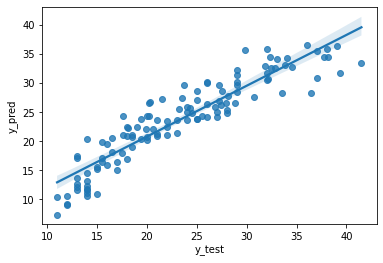

In [119]:
sns.regplot(x=comp["y_test"], y=comp["y_pred"])

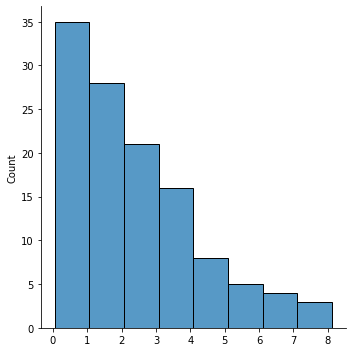

In [120]:
sns.displot(x=abs(comp["y_test"] - comp["y_pred"]))

# Some Statistics

In [122]:
print("Score of our model for training data: ", lm.score(X_train, y_train))

Score of our model for training data:  0.8141025501610559


In [123]:
print("Score of our model for testing data: ", lm.score(X_test, y_test))

Score of our model for testing data:  0.8433135132808829


In [124]:
from sklearn import metrics

In [126]:
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error: ", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Square Error: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error:  2.354281207220402
Mean Squared Error:  9.16097967896156
Root Mean Square Error:  3.026711033277138
